C:\Users\iks14535\AppData\Local\Temp\ipykernel_40900\2707170734.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()  # in a script; replace with plt.savefig(...) to write to file


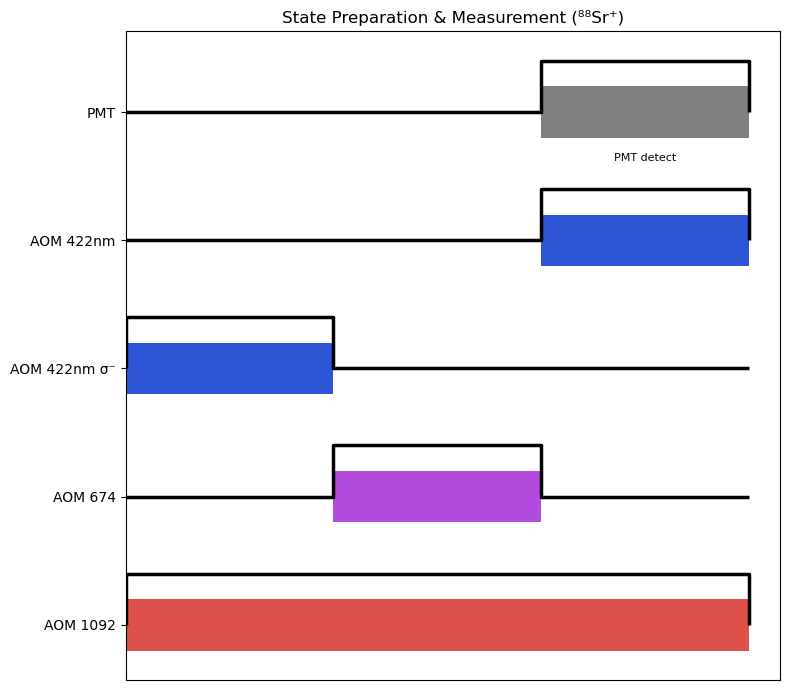

In [1]:
#!/usr/bin/env python3
"""
examples/basic_usage.py

Demonstrates creating a Pulse → Sequence → plot workflow
using the week4 library.
"""


from week4.core import Pulse, Sequence
from week4.plot import plot_matplotlib
from week4.config import DEFAULT_CHANNEL_ORDER

def main():
    # 1) Define your pulse timings (in µs, ms, whatever units you choose)
    t_prep   = 30
    t_pulse  = 30
    t_det    = 30

    # 2) Create individual Pulse objects
    #    channel: str
    #    t0:       float, start time
    #    dt:      float, duration
    #    color:    str, any Matplotlib color spec
    #    label:    str, optional annotation
    pulses = [
        Pulse('PMT',           t0=t_prep + t_pulse,        dt=t_det, color='grey', label='PMT detect'),
        Pulse('AOM 422nm',     t0=t_prep + t_pulse,        dt=t_det, color='#2E55D6'),
        Pulse('AOM 422nm σ⁻',   t0=0,                       dt=t_prep, color='#2E55D6'),
        Pulse('AOM 674',       t0=t_prep,                  dt=t_pulse, color='#B34ADC'),
        Pulse('AOM 1092',      t0=0,                       dt=t_prep + t_pulse + t_det, color='#DC514A'),
    ]

    # 3) Pack them into a Sequence
    seq = Sequence(pulses)

    # 4) Choose a display order for channels (or use DEFAULT_CHANNEL_ORDER)
    channel_order = [
        'PMT',
        'AOM 422nm',
        'AOM 422nm σ⁻',
        'AOM 674',
        'AOM 1092'
    ]

    # 5) Render with Matplotlib
    fig, ax = plot_matplotlib(seq, channel_order=channel_order)

    # (Optional) Reverse y-axis so first entry appears at top
    ax.invert_yaxis()

    # (Optional) Remove built-in x-tick labels if you want a clean look
    ax.set_xticklabels([])
    ax.tick_params(axis='x', which='both', bottom=False, top=False)

    # (Optional) Add your own title or labels
    ax.set_title('State Preparation & Measurement (⁸⁸Sr⁺)')

    # 6) Final layout tweaks and show
    fig.tight_layout()
    fig.show()  # in a script; replace with plt.savefig(...) to write to file

if __name__ == '__main__':
    main()
